<a href="https://www.kaggle.com/code/arwaabouattia/lstm-from-scratch-two-implementations?scriptVersionId=229457070" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Long Short-Term Memory (LSTM) From Scratch: Two Implementations📝

This notebook presents two different implementations of an `LSTM` model:
1. **Simple Numeric LSTM Example:**  
   A minimal example that demonstrates the inner computations of an LSTM cell using a simple numerical sequence ([10, 20, 30]).  
2. **Text-based LSTM with WordCloud and Training:**  
   An advanced implementation using a text excerpt. It includes data preprocessing, dictionary creation for characters, forward and backward propagation, training over multiple epochs, and visualization with a word cloud.

Below, each section is explained and implemented step by step.


### Before we start, here is a simple explanation of `LSTM` first:

Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) designed to address the challenges of learning long-term dependencies in sequential data, such as the `vanishing` or` exploding gradient` problem. 
    
Unlike traditional RNNs, LSTMs use a **Cell State** and **three gates**—input, forget, and output gates—to regulate the flow of information, enabling them to retain relevant information over extended time intervals.

### Key Features of LSTM:
- **Cell State (Memory Cell- Candidate Cell)**: Stores information over time, preserving it across multiple time steps.
- **Input Gate**: Controls how much new information is added to the memory.
- **Forget Gate**: Determines what information should be discarded from the memory.
- **Output Gate**: Decides the amount of information from the memory to output.


For a detailed explanation:

- [Introduction to Long Short-Term Memory (LSTM)](http://medium.com/analytics-vidhya/introduction-to-long-short-term-memory-lstm-a8052cd0d4cd)

- [The classic research paper by Hochreiter and Schmidhuber](https://deeplearning.cs.cmu.edu/S23/document/readings/LSTM.pdf)

  
  ----------------

## 1- Simple Numeric LSTM Example ❤️‍🔥

In this section, we implement a basic `LSTM` from scratch using a **numerical example**.

We use a small input sequence: [10, 20, 30] and predefined weights to compute the `LSTM` gates **(forget, input, candidate cell, and output)**, update the cell state and hidden state, and finally predict the next value using a **linear transformation**.  

In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

In [3]:
# LSTM parameters for the simple example

W_f, U_f, b_f = 0.4, 0.1, 0  # (Forget gate) parameters
W_i, U_i, b_i = 0.5, 0.15, 0  # (Input gate) parameters
W_c, U_c, b_c = 0.6, 0.2, 0   # (Candidate cell state) parameters
W_o, U_o, b_o = 0.7, 0.25, 0  # (Output gate) parameters

In [4]:
# Initial hidden state and cell state
h_prev = 0.0
C_prev = 0.0

In [5]:
# Input sequence changed to [10, 20, 30]
X = [10, 20, 30]

In [6]:
# Parameters for the final output prediction
W_y, b_y = 3, 0

In [7]:
# Lists to store hidden states and cell states for each time step
hs = []
Cs = []

In [8]:
# Lists to store gate values for visualization
forget_gate_values = []
input_gate_values = []
candidate_values = []
output_gate_values = []

In [9]:
for t, x in enumerate(X, start=1):
    # Calculate (forget gate)
    f_t = sigmoid(W_f * x + U_f * h_prev + b_f)
    
    # Calculate (input gate)
    i_t = sigmoid(W_i * x + U_i * h_prev + b_i)
    
    # Calculate (candidate cell state)
    C_t_candidate = tanh(W_c * x + U_c * h_prev + b_c)
    
    # (Update cell state)
    C_t = f_t * C_prev + i_t * C_t_candidate
    
    # (Calculate output gate)
    o_t = sigmoid(W_o * x + U_o * h_prev + b_o)

    # Store gate values
    forget_gate_values.append(f_t)
    input_gate_values.append(i_t)
    candidate_values.append(C_t_candidate)
    output_gate_values.append(o_t)
    
    # (Update hidden state)
    h_t = o_t * tanh(C_t)
    
    # Save the results
    hs.append(h_t)
    Cs.append(C_t)
    
    # Prepare for next time step
    h_prev, C_prev = h_t, C_t
    
    # Print the computations for the --current time step--
    print(f"Time Step {t}, Input = {x}")
    print(f"  f_t = {f_t:.3f}, i_t = {i_t:.3f}, C_t_candidate = {C_t_candidate:.3f}")
    print(f"  C_t = {C_t:.3f}, o_t = {o_t:.3f}, h_t = {h_t:.3f}\n")


Time Step 1, Input = 10
  f_t = 0.982, i_t = 0.993, C_t_candidate = 1.000
  C_t = 0.993, o_t = 0.999, h_t = 0.758

Time Step 2, Input = 20
  f_t = 1.000, i_t = 1.000, C_t_candidate = 1.000
  C_t = 1.993, o_t = 1.000, h_t = 0.964

Time Step 3, Input = 30
  f_t = 1.000, i_t = 1.000, C_t_candidate = 1.000
  C_t = 2.993, o_t = 1.000, h_t = 0.995



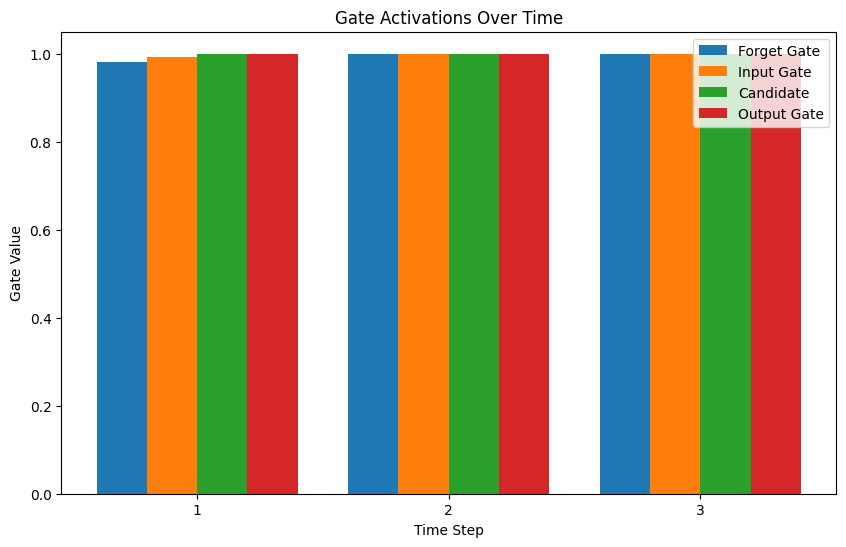

In [10]:
# Bar chart of gate values
import matplotlib.pyplot as plt

time_steps = range(1, len(X)+1)
plt.figure(figsize=(10, 6))
width = 0.2

plt.bar([p - 1.5*width for p in time_steps], forget_gate_values, width=width, label='Forget Gate')
plt.bar([p - 0.5*width for p in time_steps], input_gate_values, width=width, label='Input Gate')
plt.bar([p + 0.5*width for p in time_steps], candidate_values, width=width, label='Candidate')
plt.bar([p + 1.5*width for p in time_steps], output_gate_values, width=width, label='Output Gate')

plt.xlabel("Time Step")
plt.ylabel("Gate Value")
plt.title("Gate Activations Over Time")
plt.xticks(time_steps)

plt.legend()
plt.show()

In [11]:
# Predict the next value using the last hidden state
h_T = hs[-1]
y_pred = W_y * h_T + b_y

print(f"Predicted next value: {y_pred:.3f}")

Predicted next value: 2.985


As you can see, the answer is `2.985`, so why doesn't the model produce a prediction of 40 🤔🤔?

    Because the weights and values used in the example were chosen randomly for illustration purposes, and there is no learning or training mechanism to adjust them to fit the sequence of [10, 20, 30] to produce 40. Therefore, the calculations are not consistent with the predictions of the real sequence. It is a very simple application to understand the structure of the (LSTM).
    
    you can complete the codes until you reach a code that adjusts the parameters until it reaches the result.

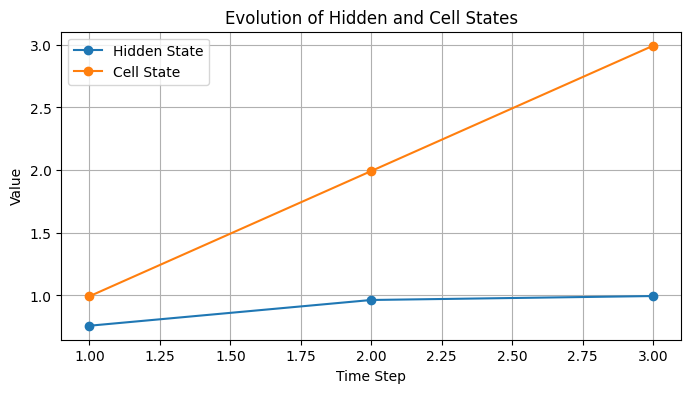

In [12]:
import matplotlib.pyplot as plt

# Assume hs and Cs store the hidden and cell states for each time step
time_steps = range(1, len(hs) + 1)

plt.figure(figsize=(8, 4))
plt.plot(time_steps, hs, marker='o', label='Hidden State')
plt.plot(time_steps, Cs, marker='o', label='Cell State')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Evolution of Hidden and Cell States')
plt.legend()
plt.grid(True)
plt.show()

## 2- Text-based `LSTM` with WordCloud and Training🔥

In this section, we implement a more complex example using a text excerpt.

We first preprocess the text by **removing punctuation**, **converting it to lowercase**, and **building a dictionary mapping for characters**.  
Then, we create a **WordCloud** visualization for the input text.

After that, we build an `LSTM` network for character-level modeling. 

This implementation includes:
- Defining activation functions and their derivatives.
- Building the **forward propagation** function that computes the `LSTM` cell operations.
- Implementing **backward propagation** to compute gradients and update weights via **SGD**.
- Running a training loop over multiple epochs and tracking the loss.


In [13]:
import numpy as np
import string
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

In [14]:
# Create stopwords set for WordCloud
stopwords = set(STOPWORDS)

In [15]:
# text example from "A Tale of Two Cities" by Charles Dickens 😎

data = """
It was the best of times, it was the worst of times,
it was the age of wisdom, it was the age of foolishness,
it was the epoch of belief, it was the epoch of incredulity,
it was the season of Light, it was the season of Darkness,
it was the spring of hope, it was the winter of despair.
"""

In [16]:
# Generate a WordCloud from the input text
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=200,
    max_font_size=40, 
    random_state=42
).generate(data)

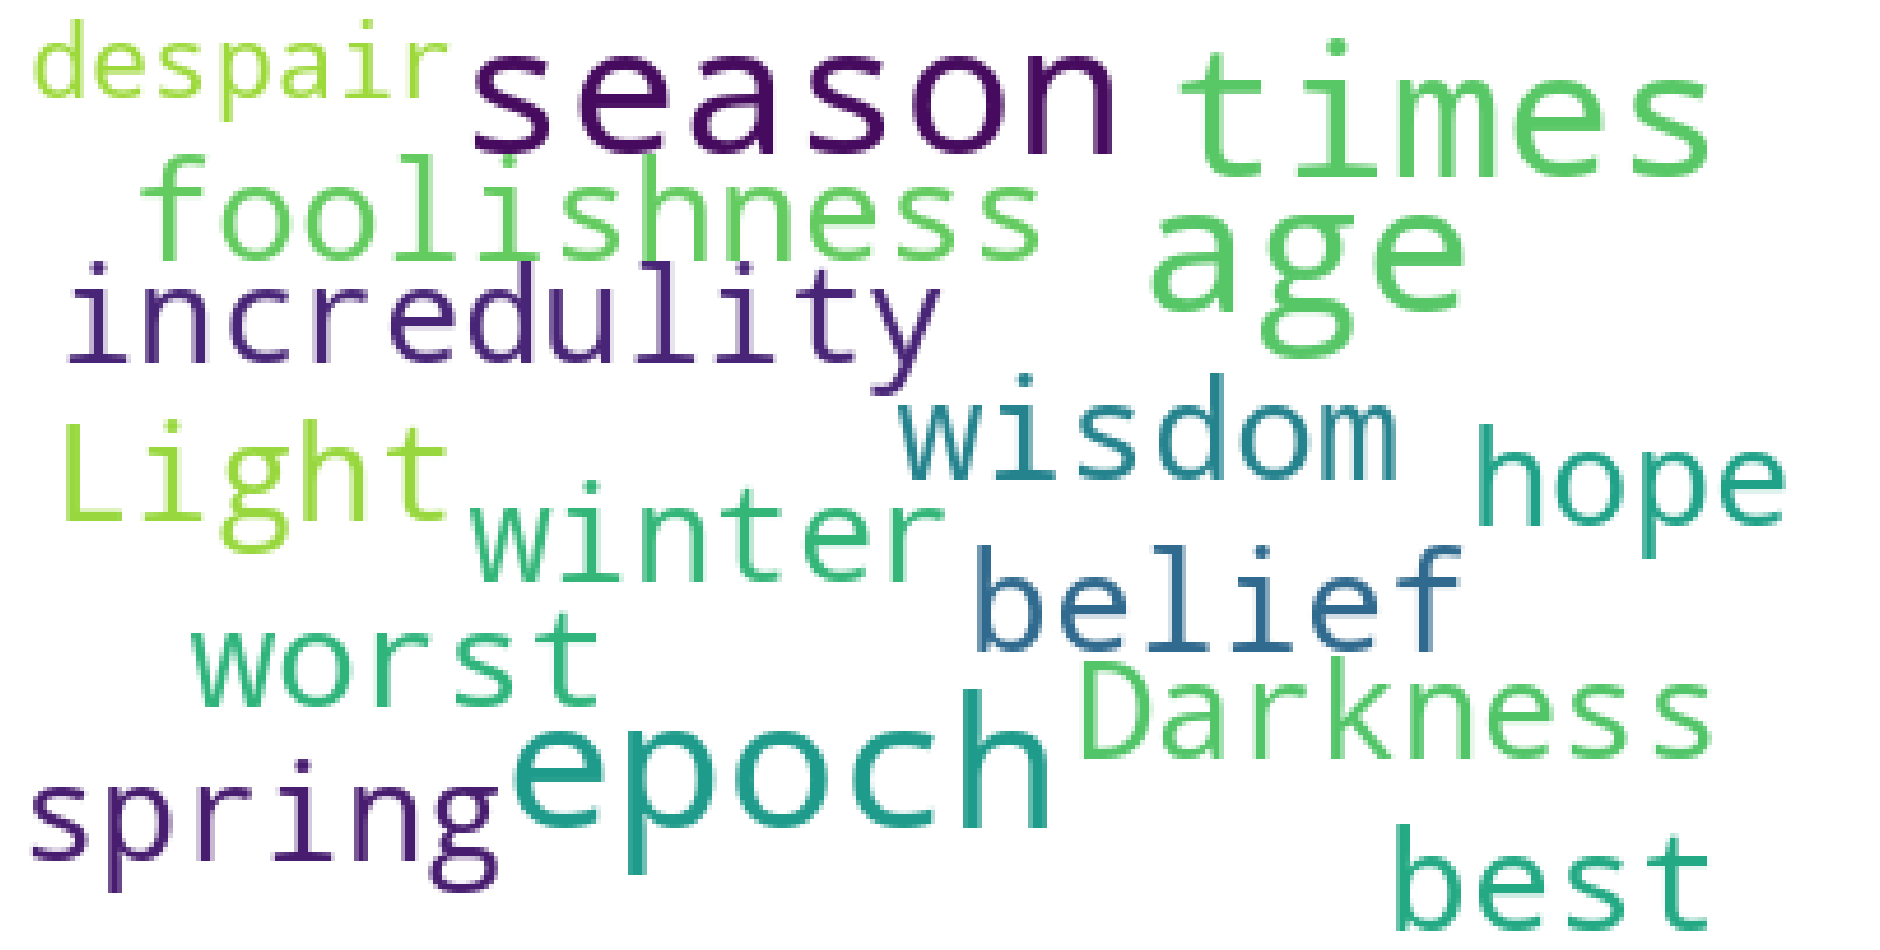

In [17]:
# Plot the WordCloud in three subplots
fig, ax = plt.subplots(figsize=(24, 24))
ax.imshow(wordcloud)
ax.axis('off')
plt.show()

----
## - Data Preparation and Dictionary Creation
----
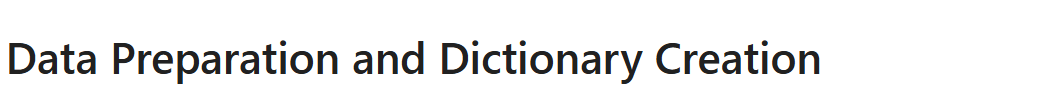

In [18]:
# Remove newline characters
data = data.replace("\n", " ")

# Convert text to lowercase
data = data.lower()

# Remove punctuation
data = data.translate(str.maketrans('', '', string.punctuation))

# Optionally remove the first and last character (if needed)
data = data[1:-1]

print(f"Processed Data:\n{data}")

Processed Data:
it was the best of times it was the worst of times it was the age of wisdom it was the age of foolishness it was the epoch of belief it was the epoch of incredulity it was the season of light it was the season of darkness it was the spring of hope it was the winter of despair


In [19]:
# Create character dictionaries
chars = sorted(set(data))
char_to_idx = {c: i for (i, c) in enumerate(chars)}
idx_to_char = {i: c for (i, c) in enumerate(chars)}

----
## - Parameters and Activation Functions
----
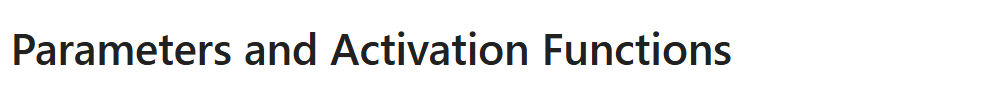

In [20]:
data_size, char_size = len(data), len(chars)

hidden_size = 10  # Size of hidden layer
weight_sd = 0.1   # Standard deviation for weight initialization
z_size = hidden_size + char_size  # Combined size of previous hidden state and current input
t_steps = 25  # Time steps for training

In [21]:
# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(y):
    return y * (1 - y)



def tanh(x):
    return np.tanh(x)

def dtanh(y):
    return 1 - y * y

----
## - Architecture Visualization
----

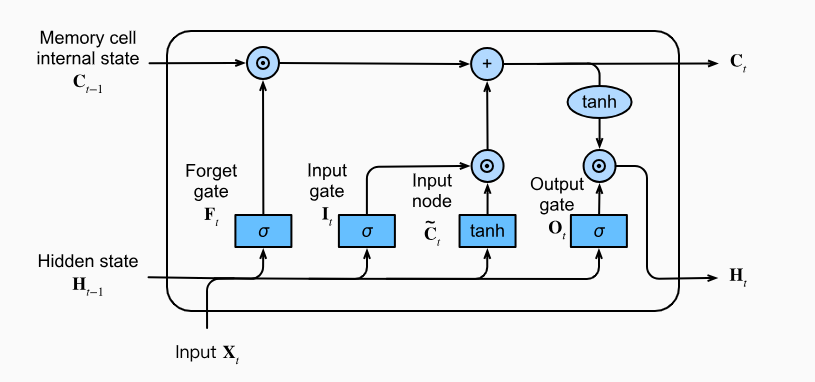
    **Fig.10.1.4 In [(LSTM) Chapter In Modern Recurrent Neural Networks](https://d2l.ai/chapter_recurrent-modern/lstm.html)**

----
## - Implementation: Forward Pass and Optimization Functions
----

Perform a **forward pass** through the `LSTM` cell:

    Inputs:
      - x: one-hot encoded input vector (char_size x 1)
      - u: previous cell state (hidden state)
      - q: previous hidden state
    Returns:
      - z: concatenated vector of q and x
      - a, b, c, d: gate activations (sigmoid and tanh outputs)
      - e: cell state update
      - h: new hidden state
      - v: output before softmax
      - y: probability distribution over characters

In [22]:
def forward(x, u, q):
    z = np.row_stack((q, x))
    a = sigmoid(np.dot(wa, z) + ba)
    b = sigmoid(np.dot(wb, z) + bb)
    c = tanh(np.dot(wc, z) + bc)
    d = sigmoid(np.dot(wd, z) + bd)
    e = a * u + b * c
    h = d * tanh(e)
    v = np.dot(wv, h) + bv
    y = np.exp(v) / np.sum(np.exp(v))
    return z, a, b, c, d, e, h, v, y

Update model parameters using `SGD`:

    Inputs:
      - grads: gradients for each parameter
      - theta: current parameters (weights and biases)
      - lr: learning rate
    Returns:
      - Updated parameters

In [23]:
def optimize(grads, theta, lr=0.05):
    dwa, dwb, dwc, dwd, dwv, dba, dbb, dbc, dbd, dbv = grads
    wa, wb, wc, wd, wv, ba, bb, bc, bd, bv = theta
    wa -= dwa * lr
    wb -= dwb * lr
    wc -= dwc * lr
    wd -= dwd * lr
    wv -= dwv * lr
    ba -= dba * lr
    bb -= dbb * lr
    bc -= dbc * lr
    bd -= dbd * lr
    bv -= dbv * lr
    return wa, wb, wc, wd, wv, ba, bb, bc, bd, bv

----
## - Initialize Variables and Model Parameters
----

In [24]:
losses = {}
z, a, b, c, d, e, h, v, y = {}, {}, {}, {}, {}, {}, {}, {}, {}
q, x, u = {}, {}, {}

In [25]:
# Initialize weights for LSTM gates (wa, wb, wc, wd)
wa, wb, wc, wd = [np.random.randn(hidden_size, z_size) * weight_sd + 0.5 for _ in range(4)]
ba, bb, bc, bd = [np.zeros((hidden_size, 1)) for _ in range(4)]

In [26]:
# Output layer parameters
wv = np.random.randn(char_size, hidden_size) * weight_sd
bv = np.zeros((char_size, 1))
q[-1] = np.zeros((hidden_size, 1))
u[-1] = np.zeros((hidden_size, 1))

In [27]:
# Prepare training data (one-hot encoding indices)
pointer = 25
t_steps = 25
inputs = [char_to_idx[ch] for ch in data[pointer: pointer + t_steps]]
targets = [char_to_idx[ch] for ch in data[pointer + 1: pointer + t_steps + 1]]

---
## - Training Loop
---

In [28]:
for epoch in range(1000):
    loss = 0
    
    # Forward propagation for each time step
    for t in range(len(inputs)):
        # Create one-hot encoded vector for input character
        x[t] = np.zeros((char_size, 1))
        x[t][inputs[t]] = 1

        # Forward pass through the LSTM cell
        z[t], a[t], b[t], c[t], d[t], e[t], h[t], v[t], y[t] = forward(x[t], u[t - 1], q[t - 1])
        u[t], q[t] = e[t], h[t]

        loss += -np.log(y[t][targets[t], 0])

    # Initialize gradients for backpropagation
    dh_next = np.zeros_like(q[0])
    de_next = np.zeros_like(u[0])
    dwa, dwb, dwc, dwd, dwv = 0, 0, 0, 0, 0
    dba, dbb, dbc, dbd, dbv = 0, 0, 0, 0, 0

    # Backward propagation through time (BPTT)
    for t in reversed(range(len(inputs))):
        target = targets[t]
        dv = np.copy(y[t])
        dv[target] -= 1

        dwv += np.dot(dv, h[t].T)
        dbv += dv

        dh = np.dot(wv.T, dv) + dh_next

        dd = dh * tanh(e[t])
        dd = dsigmoid(d[t]) * dd

        dwd += np.dot(dd, z[t].T)
        dbd += dd

        de = np.copy(de_next)
        de += dh * d[t] * dtanh(tanh(e[t]))

        dc = de * b[t]
        dc = dtanh(c[t]) * dc

        dwc += np.dot(dc, z[t].T)
        dbc += dc

        db_temp = de * dc
        db_temp = dsigmoid(b[t]) * db_temp
        dwb += np.dot(db_temp, z[t].T)
        dbb += db_temp

        da = de * u[t - 1]
        da = dsigmoid(a[t]) * da
        dwa += np.dot(da, z[t].T)
        dba += da

        dz = (np.dot(wa.T, da) 
              + np.dot(wb.T, db_temp) 
              + np.dot(wc.T, dc) 
              + np.dot(dd.T, dd))
        dh_next = dz[:hidden_size, :]
        de_next = a[t] * de

    grads = (dwa, dwb, dwc, dwd, dwv, dba, dbb, dbc, dbd, dbv)
    theta = (wa, wb, wc, wd, wv, ba, bb, bc, bd, bv)
    
    # Update parameters using SGD
    wa, wb, wc, wd, wv, ba, bb, bc, bd, bv = optimize(grads, theta)
        
    losses[epoch] = loss

<ipython-input-28-f669dbd4638c>:48: RuntimeWarning: overflow encountered in multiply
  db_temp = de * dc
<ipython-input-28-f669dbd4638c>:50: RuntimeWarning: invalid value encountered in add
  dwb += np.dot(db_temp, z[t].T)


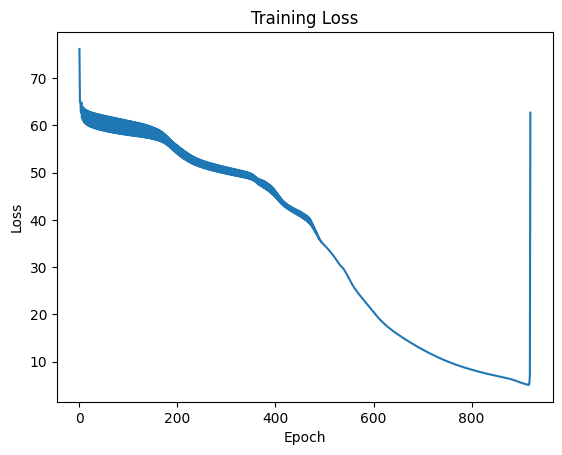

In [29]:
# Plot training loss over epochs
plt.plot(list(losses.keys()), list(losses.values()))
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()

## 3- Differences Between the Two Implementations

1. **Domain and Input Data:**
   - **Simple Numeric `LSTM` Example:**  
     Uses a small numerical sequence `[10, 20, 30]` to demonstrate the internal computations of an LSTM cell. The focus is on understanding how each gate (forget, input, candidate, output) is computed step-by-step.
     
   - **Text-based LSTM with WordCloud and Training:**  
     Uses a text excerpt from "A Tale of Two Cities" (new text example) for character-level language modeling. The text is preprocessed and a character dictionary is built for sequence prediction.

2. **Complexity of the Model:**
   - **Numeric Example:**  
     Implements a single forward pass through the LSTM with a fixed input sequence and performs a final prediction using a simple linear transformation.
   - **Text-based Example:**  
     Implements a full training loop with forward and backward propagation through time (BPTT), gradient computation, and weight updates using SGD over multiple epochs. It targets learning character-level patterns in text.

3. **Libraries and Tools:**
   - **Numeric Example:**  
     Relies solely on NumPy for numerical computations.
     
   - **Text-based Example:**  
     Utilizes additional libraries such as Pandas, Matplotlib, and WordCloud for data visualization, preprocessing, and analysis.

4. **Purpose and Educational Focus:**
   - **Numeric Example:**  
     Aims to simplify the understanding of LSTM inner workings using a clear, minimal example.
     
   - **Text-based Example:**  
     Provides a comprehensive, practical implementation that demonstrates how LSTMs can be applied to natural language processing tasks, including data preprocessing, training, and result visualization.


----------